In [67]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn 
from sklearn.decomposition import PCA
import librosa, librosa.display
import urllib, contextlib
import IPython.display
import wave

plt.rcParams['figure.figsize'] = (14,4)

(19, 431)


/usr/local/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


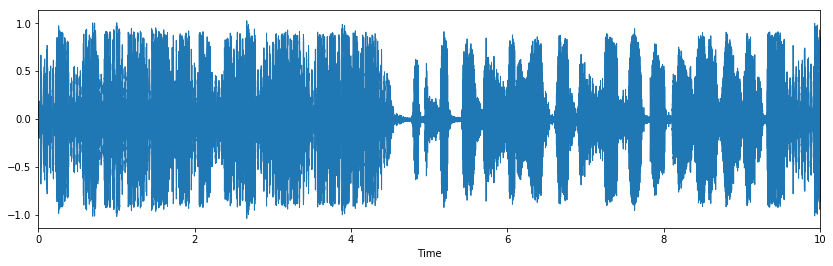

In [68]:
sample = '/Volumes/PARTH/music samples/Uproar.wav'
with contextlib.closing(wave.open(sample,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    length = frames / float(rate)

y, sr = librosa.load(sample, offset=(length/2) - 5, duration=10)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs = np.delete(mfccs, 1, 0)

deltas = librosa.feature.delta(mfccs, order=1)
acceleration = librosa.feature.delta(mfccs, order=2)

print(np.shape(mfccs))
librosa.display.waveplot(y, sr=sr)

In [69]:
IPython.display.Audio(y, rate=sr)

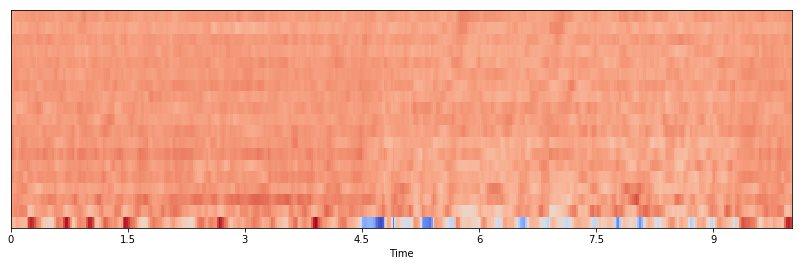

In [70]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [71]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
acceleration = sklearn.preprocessing.scale(acceleration, axis=1)
deltas = sklearn.preprocessing.scale(deltas, axis=1)

print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.64859103e-16  3.29718207e-17 -6.59436414e-17  3.29718207e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.29718207e-17 -2.47288655e-17  2.47288655e-17  6.59436414e-17
  6.59436414e-17  0.00000000e+00  6.59436414e-17 -3.29718207e-17
  3.29718207e-17  1.07158417e-16  1.64859103e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


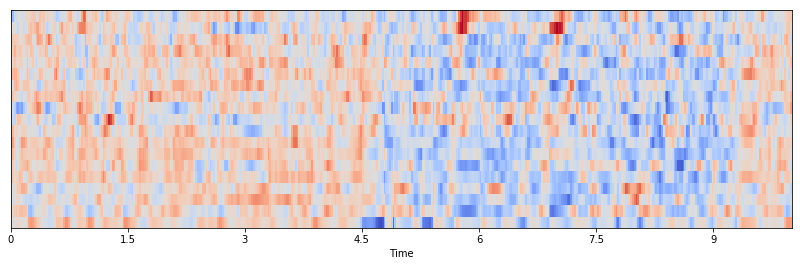

In [72]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='off')

[[ 0.09760184  0.05493213  0.08195476 ...  1.74791366  1.82202332
   1.65543939]
 [ 0.63480046  0.49305172  0.74465576 ... -1.52713972 -1.33876445
  -0.57981251]
 [-0.29429578 -0.18768323  0.0961837  ... -0.64836714 -0.5690152
  -0.25121961]
 ...
 [ 0.43957587  0.43957587  0.43957587 ... -0.1580901  -0.1580901
  -0.1580901 ]
 [ 0.1171666   0.1171666   0.1171666  ...  0.06397556  0.06397556
   0.06397556]
 [-0.78676629 -0.78676629 -0.78676629 ...  0.35419796  0.35419796
   0.35419796]]


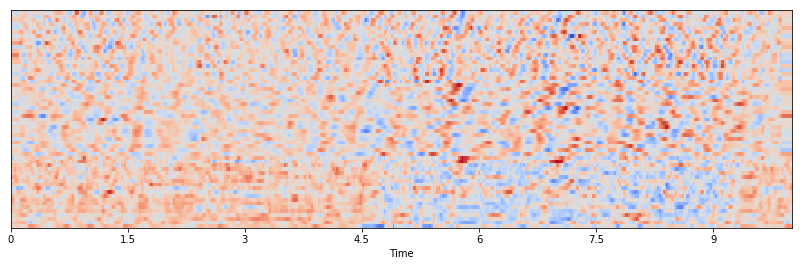

In [73]:
all_features = np.concatenate((mfccs, deltas, acceleration))
librosa.display.specshow(all_features, sr=sr, x_axis='time', y_axis='off')
print(all_features)

In [74]:
all_features = all_features.T

In [81]:
pca = PCA(n_components=5)
reduced = pca.fit(all_features)
print(reduced.components_.shape)
print(reduced.explained_variance_)

(5, 57)
[6.25410408 4.93944984 3.66490228 3.4731202  2.92660552]
